# 06과 단변량분석 종합실습과제

* 고객사는 카시트를 판매하는 회사 입니다.
* 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
    * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
    * 너무 국내 시장에 집중됨.
    * 지역마다의 구매력을 제대로 파악하지 못하고 있음.

* 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.
* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
* 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
* 드디어 AIVLE 과정에서 배운 [파이썬 라이브러리 활용]과 [데이터 분석] 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
* 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## 카시트 판매량 데이터

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [105]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
data = pd.read_csv(path)
data.drop('Education', axis = 1, inplace = True)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


### ① Sales (Target) 

In [3]:
S = data['Sales']
S.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

1) 변수의 비즈니스 의미

> 각 지역 판매액(단위 : 1000달러)

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [5]:
S.isnull().sum()

0

4) 가변수화 필요 여부

> 숫자이므로 가변수화 불필요!

5) 기초통계량(수치화)

In [6]:
S.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

6) 분포 확인(시각화)

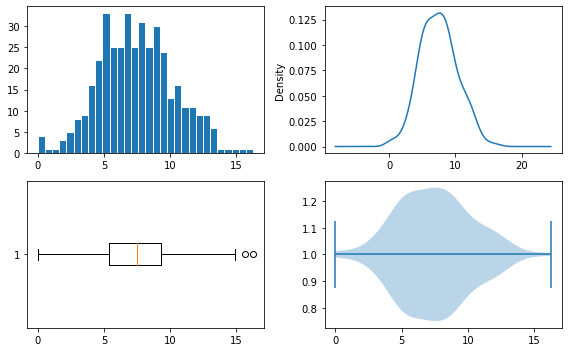

In [16]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(S, bins=30, edgecolor='white')

plt.subplot(2,2,2)
S.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(S, vert = False)

plt.subplot(2,2,4)
plt.violinplot(S, vert=False)

plt.tight_layout()
plt.show()


7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 지역의 판매액은 5~10 (기준 : 1000 달러) 이다.

8) 추가 분석해 볼 사항이 있나요?

* 지역 판매액이 0~5인 지역들의 평균 소득, 경쟁사 가격, 도심 지역 여부를 확인하여 , 판매 가격이 합당한지 판단한다.
* 지역 판매액이 5 ~ 10 인 지역들과 0~5인 지역들의 지역 평균 소득, 지역 인구수, 판매 가격, 지역 인구의 연령 평균, 도심 지역 여부를 
    비교하여, 지역 판매액이 차이 나는 이유를 파악한다.
* 지역 판매액이 10 ~ 15인 지역들의 판매 가격을 확인하여, 낮은 금액으로 많이 팔았는지, 또는 높은 금액으로 적게 팔았는지 확인한다.

### ② CompPrice

In [17]:
cp = data['CompPrice']
cp.head()

0    138
1    111
2    113
3    117
4    141
Name: CompPrice, dtype: int64

1) 변수의 비즈니스 의미

> 경쟁사 가격 ( 단위 : 달러 )

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [18]:
cp.isnull().sum()

0

4) 가변수화 필요 여부

>불필요

5) 기초통계량(수치화)

In [19]:
cp.describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

6) 분포 확인(시각화)

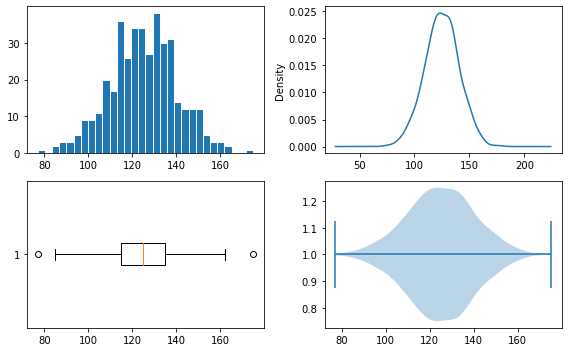

In [25]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(cp, bins=30, edgecolor='white')

plt.subplot(2,2,2)
cp.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(cp, vert=False)

plt.subplot(2,2,4)
plt.violinplot(cp,vert=False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 경쟁사 가격은 대체로 약 120 ~ 135 달러이다.

8) 추가 분석해 볼 사항이 있나요?

* 경쟁사 가격이 대체로 약 120 ~ 135 달러인 지역의 판매 가격을 비교한다.
* -> 판매 가격이 비슷하지만, 경쟁사의 총 판매액과 해당 지역의 총 판매액이 차이날 경우, 원인을 분석한다.
* -> 비교 관점으로는, 진열 상태와 광고, 해당 매장이 미국에 있는지 여부를 비교해 본다.
* -> 또한, 경쟁사는 어떤 프로모션을 진행하고 있는지, 혜택이나 이벤트를 파악한다.

### ③ Income

In [26]:
ic = data['Income']
ic.head()

0     73
1     48
2     35
3    100
4     64
Name: Income, dtype: int64

1) 변수의 비즈니스 의미

> 지역 평균 소득 ( 단위 : 1000달러 )

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [27]:
ic.isnull().sum()

0

4) 가변수화 필요 여부

> 불필요

5) 기초통계량(수치화)

In [28]:
ic.describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

6) 분포 확인(시각화)

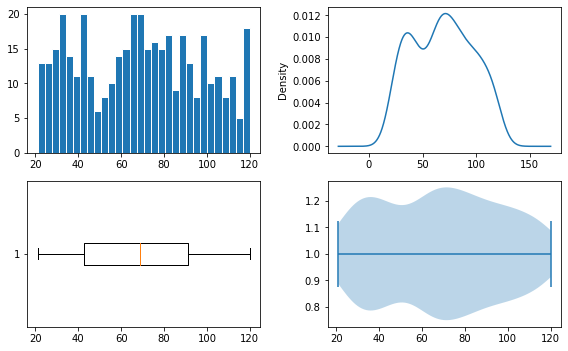

In [36]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(ic, bins=30, edgecolor='white')

plt.subplot(2,2,2)
ic.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(ic, vert=False)

plt.subplot(2,2,4)
plt.violinplot(ic, vert=False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 특정 지역을 제외하고, 지역 평균의 소득의 분포는 비슷하다.

8) 추가 분석해 볼 사항이 있나요?

* 평균 소득이 가장 큰 지역과, 가장 작은 지역의 평균 연령, 판매 가격, 지역 인구수, 도심 여부를 비교한다.

### ④ Advertising

In [37]:
ad = data['Advertising']
ad.head()

0    11
1    16
2    10
3     4
4     3
Name: Advertising, dtype: int64

1) 변수의 비즈니스 의미

> 각 지역, 회사의 광고 예산 ( 단위 : 1000달러 )

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [38]:
ad.isnull().sum()

0

4) 가변수화 필요 여부

> 불필요

5) 기초통계량(수치화)

In [39]:
ad.describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

6) 분포 확인(시각화)

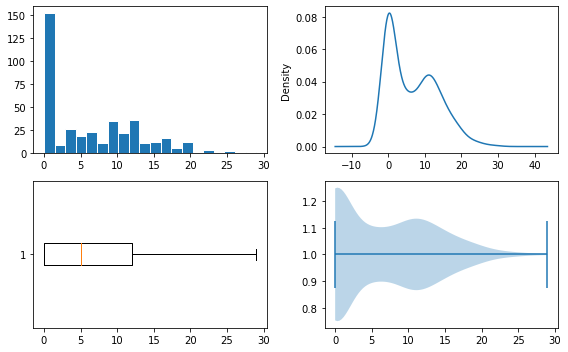

In [44]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(ad, bins=20, edgecolor='white')

plt.subplot(2,2,2)
ad.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(ad, vert=False)

plt.subplot(2,2,4)
plt.violinplot(ad, vert=False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 기준 : 1000 달러
* 대부분 광고 예산은 0~1 이다.

8) 추가 분석해 볼 사항이 있나요?

> 기준 : 1000 달러
* 광고 예산이 10~20 인 곳의 판매액과 해당 지역의 경쟁사 판매액을 비교하여, 광고 비용이 합당한지 판단한다.

### ⑤ Population

In [45]:
p = data['Population']
p.head()

0    276
1    260
2    269
3    466
4    340
Name: Population, dtype: int64

1) 변수의 비즈니스 의미

> 지역 인구수 ( 단위 : 1000명 )

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [47]:
p.isnull().sum()

0

4) 가변수화 필요 여부

> 불필요

5) 기초통계량(수치화)

In [48]:
p.describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

6) 분포 확인(시각화)

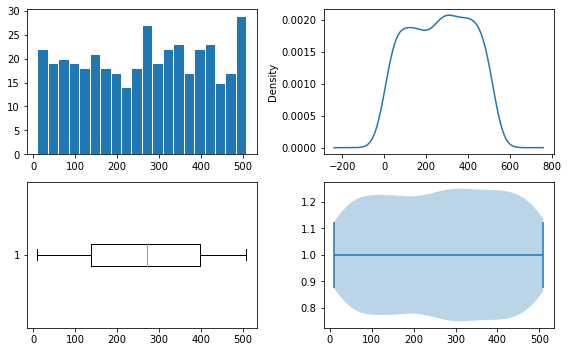

In [53]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(p, bins=20, edgecolor='white')

plt.subplot(2,2,2)
p.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(p, vert=False)

plt.subplot(2,2,4)
plt.violinplot(p, vert = False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 특정 지역을 제외하고, 인구 분포는 비슷하다.

8) 추가 분석해 볼 사항이 있나요?

* 인구수가 많은 지역의 총 판매액이 가장 많은지 확인해본다.
* 인구수가 가장 적은 지역은 도심 지역인지 확인해본다.
* 인구수가 가장 많은 지역과 가장 적은 지역의 총 판매액, 평균 연령, 판매 가격을 비교해본다.

### ⑥ Price

In [54]:
price = data['Price']
price.head()

0    120
1     83
2     80
3     97
4    128
Name: Price, dtype: int64

1) 변수의 비즈니스 의미

> 자사 지역별 판매 가격

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [55]:
price.isnull().sum()

0

4) 가변수화 필요 여부

> 불필요

5) 기초통계량(수치화)

In [56]:
price.describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

6) 분포 확인(시각화)

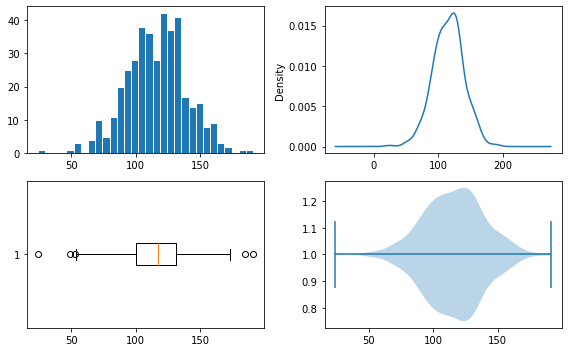

In [60]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(price, bins=30, edgecolor='white')

plt.subplot(2,2,2)
price.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(price, vert=False)

plt.subplot(2,2,4)
plt.violinplot(price, vert=False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분 판매 가격은 100 ~ 140 이다.

8) 추가 분석해 볼 사항이 있나요?

* 판매 가격이 140 이상인 지역의 판매 가격과 경쟁사 가격을 비교한다.
* 판매 가격이 100 이하인 지역의 판매 가격과 경쟁사 가격을 비교하여, 판매 가격을 더 높여도 합당한지 판단한다.
* 판매 가격이 50 이하인 지역의 평균 소득을 통해 해당 가격이 합당한지 판단한다.

### ⑦ ShelveLoc

In [61]:
sl = data['ShelveLoc']
sl.head()

0       Bad
1      Good
2    Medium
3    Medium
4       Bad
Name: ShelveLoc, dtype: object

1) 변수의 비즈니스 의미

> 진열 상태

2) 숫자, 범주?

> 범주

In [62]:
sl.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [63]:
sl.isnull().sum()

0

4) 가변수화 필요 여부

5) 기초통계량(수치화)

In [69]:
print(sl.value_counts())
print('-'*30)
print(sl.value_counts()/len(sl))

sl = sl.value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
------------------------------
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


6) 분포 확인(시각화)

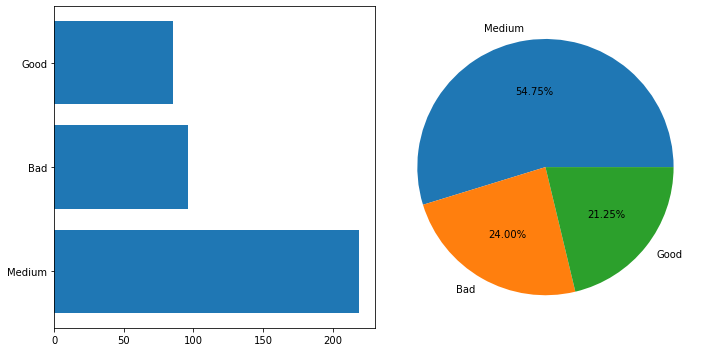

In [76]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh(sl.index, sl.values)

plt.subplot(1,2,2)
plt.pie(sl.values, labels=sl.index, autopct='%.2f%%')

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 상태가 중간인 지역이 대부분이고, 나쁜 곳과 좋은 곳의 비율은 비슷하다.

8) 추가 분석해 볼 사항이 있나요?

* 상태가 좋은 곳과 나쁜 곳의 지역 판매 액을 비교한다.
* 상태가 중간인 지역과 좋은 지역의 총 판매액을 비교하여, 진열 상태가 구매 원인이 되는지 분석한다.

### ⑧ Age

In [77]:
age = data['Age']
age.head()

0    42
1    65
2    59
3    55
4    38
Name: Age, dtype: int64

1) 변수의 비즈니스 의미

> 지역 인구의 평균 연령

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [78]:
age.isnull().sum()

0

4) 가변수화 필요 여부

5) 기초통계량(수치화)

In [79]:
age.describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

6) 분포 확인(시각화)

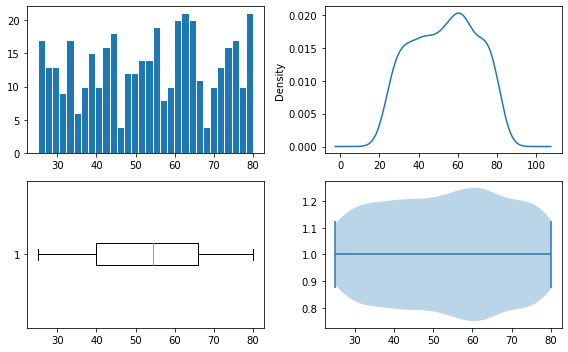

In [81]:
plt.figure(figsize=(8,5))

plt.subplot(2,2,1)
plt.hist(age, bins=30, edgecolor='white')

plt.subplot(2,2,2)
age.plot(kind='kde')

plt.subplot(2,2,3)
plt.boxplot(age, vert=False)

plt.subplot(2,2,4)
plt.violinplot(age, vert=False)

plt.tight_layout()
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대부분 평균 연령이 40~65 이다.

8) 추가 분석해 볼 사항이 있나요?

* 주 고객은 어린 아이를 키우는 부부이므로, 평균 연령대가 40 이하인 지역의 광고 예산, 진열 상태에 더 투자한다.
* 평균 연령대가 60 이상인 지역은 총 판매액이 낮다면 광고 예산을 삭감한다.

### ⑨ Urban

In [110]:
urban = data['Urban']
urban.head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Urban, dtype: object

1) 변수의 비즈니스 의미

> 도심 지역 여부

2) 숫자, 범주?

> 범주

In [111]:
urban.unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [112]:
urban.isnull().sum()

0

4) 가변수화 필요 여부

In [113]:
data['Urban'] = np.where(data['Urban'] == 'Yes', 1, 0)
urban = data['Urban']

5) 기초통계량(수치화)

In [114]:
print(urban.value_counts())
print('-'*30)
print(urban.value_counts()/len(urban))

1    282
0    118
Name: Urban, dtype: int64
------------------------------
1    0.705
0    0.295
Name: Urban, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


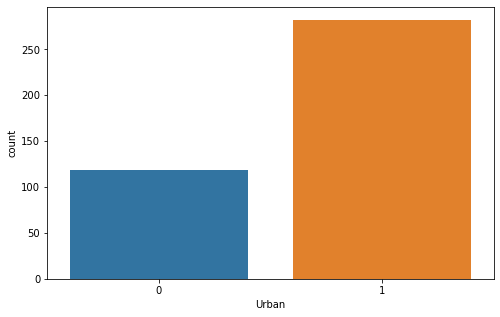

In [115]:
plt.figure(figsize=(8,5))

sns.countplot(urban)

plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대부분 지역은 도심 지역이다.

8) 추가 분석해 볼 사항이 있나요?

* 도심 지역과 도심이 아닌 지역의 평균 연령대, 총 판매액을 비교한다.
* 도심이 아닌 지역의 자동차 보유율을 분석한다.

### ⑩ US

In [106]:
us = data['US']
us.head()

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: US, dtype: object

1) 변수의 비즈니스 의미

> 매장이 미국에 있는지 여부

2) 숫자, 범주?

> 범주

In [88]:
us.unique()

array(['Yes', 'No'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [89]:
us.isnull().sum()

0

4) 가변수화 필요 여부

In [107]:
data['US'] = np.where(data['US'] == 'Yes', 1, 0)
us = data['US']
us.head()

0    1
1    1
2    1
3    1
4    0
Name: US, dtype: int32

5) 기초통계량(수치화)

In [108]:
print(us.value_counts())
print('-'*30)
print(us.value_counts()/len(us))

1    258
0    142
Name: US, dtype: int64
------------------------------
1    0.645
0    0.355
Name: US, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


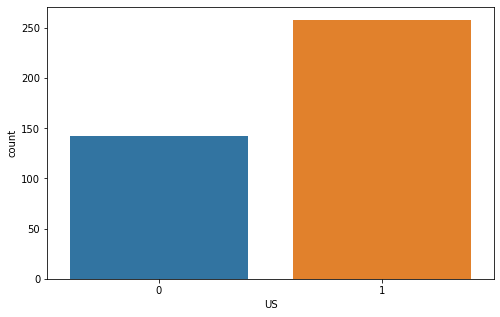

In [109]:
plt.figure(figsize=(8,5))
sns.countplot(us)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> 대부분 매장이 미국에 있다

8) 추가 분석해 볼 사항이 있나요?